<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_05_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 모듈 불러오기

import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#seaborn에서 데이터 불러오기

raw_data = sns.load_dataset('titanic')
print(raw_data.head(10)) 

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True
5         0       3    male   NaN  ...   NaN   Queenstown     no   True
6         0       1    male  54.0  ...     E  Southampton     no   True
7         0       3    male   2.0  ...   NaN  Southampton     no  False
8         1       3  female  27.0  ...   NaN  Southampton    yes  False
9         1       2  female  14.0  ...   NaN    Cherbourg    yes  False

[10 rows x 15 columns]


In [4]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [5]:
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#결측치가 들어간 컬럼을 결측치가 많거나 중요치 않은 컬럼 삭제, 적으면 채우기

#deck컬럼 삭제
raw_data =raw_data.drop(['deck', 'embark_town'], axis=1)

#age 결측값 채우기 = 선실별 who컬럼의 여,남,아이 평균으로 채워준다
raw_data['age'].fillna(raw_data.groupby('who')['age'].transform('median'), inplace=True)
raw_data.head(10)  #변환 확인

#embarked 결측치 채우기, value를 확인해보면 대부분 S에서 많이 탔기에 S로 채워준다
raw_data['embarked'] = raw_data['embarked'].fillna('S')

#타켓값이 불린 형태로 들어간 alive 컬럼 제거하기
raw_data =raw_data.drop(['alive'], axis=1)

#pclass값이 불린 형태로 들어간 class 컬럼 제거하기
raw_data =raw_data.drop(['class'], axis=1)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [10]:
#데이터 수치화하기 
from sklearn.preprocessing import LabelEncoder

#sex 컬럼을 수치화데이터로 만들기 (여자면 0, 남자는 1)
le = LabelEncoder()
sex = le.fit_transform(raw_data['sex'])
raw_data['sex'] = sex

#embarked 컬럼을 수치화데이터로 만들기(C선착장은 0, Q선착장은 1, S선착장은 2)
embarked = le.fit_transform(raw_data['embarked'])
raw_data['embarked'] = embarked

#who 컬럼을 수치화데이터로 만들기(child는 0, 남자는 1, 여자는 2)
who = le.fit_transform(raw_data['who'])
raw_data['who'] = who

#adult_male 컬럼을 수치화데이터로 만들기(남자어른이 아니면 0, 남자어른이면 1)
adult_male = le.fit_transform(raw_data['adult_male'])
raw_data['adult_male'] = adult_male

#alone 컬럼을 수치화데이터로 만들기(혼자 탑승이 아니면 0, 혼자탑승이면 1)
alone = le.fit_transform(raw_data['alone'])
raw_data['alone'] = alone

clean_data = raw_data
clean_data.head(10)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    int64  
 10  alone       891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [11]:
#피쳐, 타겟 값 나누기

target = pd.DataFrame(clean_data.iloc[:, 0], columns=['survived'])
training_data = clean_data.drop('survived', axis=1)
print(training_data.head())
print(target.head())

   pclass  sex   age  sibsp  parch     fare  embarked  who  adult_male  alone
0       3    1  22.0      1      0   7.2500         2    1           1      0
1       1    0  38.0      1      0  71.2833         0    2           0      0
2       3    0  26.0      0      0   7.9250         2    2           0      1
3       1    0  35.0      1      0  53.1000         2    2           0      0
4       3    1  35.0      0      0   8.0500         2    1           1      1
   survived
0         0
1         1
2         1
3         1
4         0


In [12]:
#숫자가 큰 두 데이터를 변수 지정해주기
value_data = training_data[['age', 'fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [14]:
#age, fare에 표준 정규데이터로 스케일링해주기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)
value_data = pd.DataFrame(scaled_data, columns= value_data.columns)
print(value_data.head())

        age      fare
0 -0.597055 -0.502445
1  0.634162  0.786845
2 -0.289251 -0.488854
3  0.403309  0.420730
4  0.403309 -0.486337


In [15]:
#새롭게 만든 value_data를 넣기 위하여 기존 컬럼 지우기
training_data.drop(['age', 'fare'], axis=1, inplace=True)
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  who  adult_male  alone
0       3    1      1      0         2    1           1      0
1       1    0      1      0         0    2           0      0
2       3    0      0      0         2    2           0      1
3       1    0      1      0         2    2           0      0
4       3    1      0      0         2    1           1      1


In [16]:
#one_hot인코딩을 위해 클래스를 더미별로 가져오기
onehot_data = pd.get_dummies(training_data['pclass'])
print(onehot_data.head())

   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [17]:
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  who  adult_male  alone
0       3    1      1      0         2    1           1      0
1       1    0      1      0         0    2           0      0
2       3    0      0      0         2    2           0      1
3       1    0      1      0         2    2           0      0
4       3    1      0      0         2    1           1      1


In [18]:
#한 컬럼안에 다양한 값을 가진 컬럼들을 더미별로 분해하기
onehot_data = pd.get_dummies(training_data, columns=training_data.columns)
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  ...  adult_male_1  alone_0  alone_1
0         0         0         1  ...             1        1        0
1         1         0         0  ...             0        1        0
2         0         0         1  ...             0        0        1
3         1         0         0  ...             0        1        0
4         0         0         1  ...             1        0        1

[5 rows x 29 columns]


In [19]:
print(onehot_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      891 non-null    uint8
 1   pclass_2      891 non-null    uint8
 2   pclass_3      891 non-null    uint8
 3   sex_0         891 non-null    uint8
 4   sex_1         891 non-null    uint8
 5   sibsp_0       891 non-null    uint8
 6   sibsp_1       891 non-null    uint8
 7   sibsp_2       891 non-null    uint8
 8   sibsp_3       891 non-null    uint8
 9   sibsp_4       891 non-null    uint8
 10  sibsp_5       891 non-null    uint8
 11  sibsp_8       891 non-null    uint8
 12  parch_0       891 non-null    uint8
 13  parch_1       891 non-null    uint8
 14  parch_2       891 non-null    uint8
 15  parch_3       891 non-null    uint8
 16  parch_4       891 non-null    uint8
 17  parch_5       891 non-null    uint8
 18  parch_6       891 non-null    uint8
 19  embarked_0    891 non-null   

In [20]:
#각각 컬럼 합치기

training_data = pd.concat([value_data, onehot_data], axis=1)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   fare          891 non-null    float64
 2   pclass_1      891 non-null    uint8  
 3   pclass_2      891 non-null    uint8  
 4   pclass_3      891 non-null    uint8  
 5   sex_0         891 non-null    uint8  
 6   sex_1         891 non-null    uint8  
 7   sibsp_0       891 non-null    uint8  
 8   sibsp_1       891 non-null    uint8  
 9   sibsp_2       891 non-null    uint8  
 10  sibsp_3       891 non-null    uint8  
 11  sibsp_4       891 non-null    uint8  
 12  sibsp_5       891 non-null    uint8  
 13  sibsp_8       891 non-null    uint8  
 14  parch_0       891 non-null    uint8  
 15  parch_1       891 non-null    uint8  
 16  parch_2       891 non-null    uint8  
 17  parch_3       891 non-null    uint8  
 18  parch_4       891 non-null    

In [21]:
#데이터 분리하기

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_data, target, test_size= 0.2)

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 31)
(712, 1)
(179, 31)
(179, 1)


In [82]:
#모델 생성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_dim=31, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               16384     
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_48 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)              

In [83]:
#모델 컴파일, 학습시키기

model.compile(loss='mse', optimizer='adam', metrics='binary_accuracy')

fit_hist = model.fit(X_train, Y_train, batch_size=300, epochs=50, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 1s 197ms/step - loss: 0.2536 - binary_accuracy: 0.4868 - val_loss: 0.2466 - val_binary_accuracy: 0.6573
Epoch 2/50
2/2 [==============================] - 0s 30ms/step - loss: 0.2463 - binary_accuracy: 0.5835 - val_loss: 0.2398 - val_binary_accuracy: 0.6154
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 0.2365 - binary_accuracy: 0.6098 - val_loss: 0.2322 - val_binary_accuracy: 0.6154
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 0.2316 - binary_accuracy: 0.6134 - val_loss: 0.2229 - val_binary_accuracy: 0.6154
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 0.2258 - binary_accuracy: 0.5975 - val_loss: 0.2134 - val_binary_accuracy: 0.6154
Epoch 6/50
2/2 [==============================] - 0s 31ms/step - loss: 0.2244 - binary_accuracy: 0.5975 - val_loss: 0.2042 - val_binary_accuracy: 0.6154
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 0.2087 - b

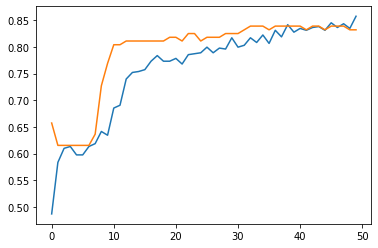

In [84]:
#학습 결과 선그래프로 나타내기

import matplotlib.pyplot as plt

plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])

In [85]:
#test데이터로 정확도 예측하기

score = model.evaluate(X_test, Y_test, verbose=0)
print('loss', score[0])
print('accuracy', score[1])

loss 0.12731249630451202
accuracy 0.8156424760818481
